<a href="https://colab.research.google.com/github/sreya-rc/TF2.0/blob/main/TF2_0_ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install TensorFlow
try:
  %tensorflow_version 2.x # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


In [ ]:
# Other imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3  # uniformly distributed between (-3, 3)
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1])

This implements the function:

$y = cos(2x_1) + cos(3x_2)$

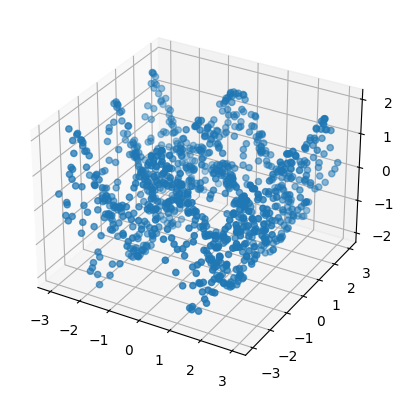

In [ ]:
# Plot the function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
# plt.show()

In [7]:
# Build model: 2 Dense layers, 128 neurons
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)  # output dimension is 1 (scalar)
])

In [12]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)  # created your own Adam optimizer and specify LR
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.0670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 13/100
32/32 [=================

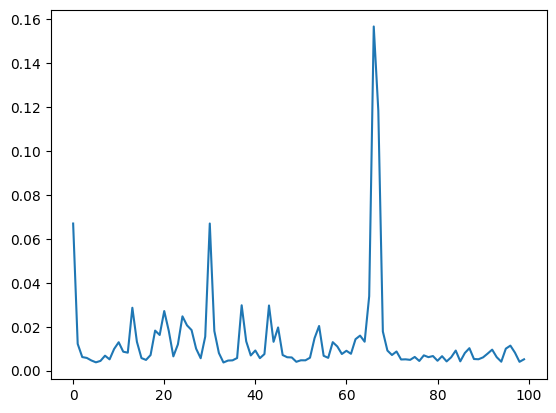

In [13]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

79/79 [==============================] - 0s 1ms/step


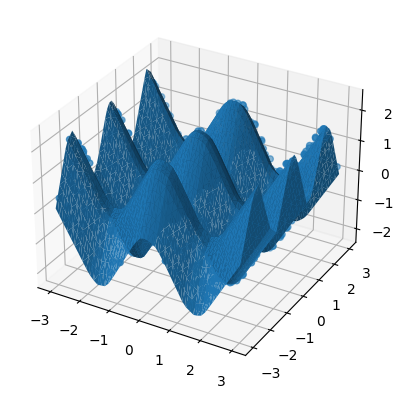

In [17]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot
line = np.linspace(-3, 3, 50)                                                       # 50 evenly spaced points between (-3, 3) along x1 and x2 axes
xx, yy = np.meshgrid(line, line)                                                    # meshgrid does the crossproduct between these sets of points (xx = x1 axis, yy = x2 axis])
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T                                   # model expects N x 2 input -> vstack stacks the 2 arrays vertically and transposes the result
Yhat = model.predict(Xgrid).flatten()                                               # result will be N x 1, not a 1D array of length N
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

79/79 [==============================] - 0s 1ms/step


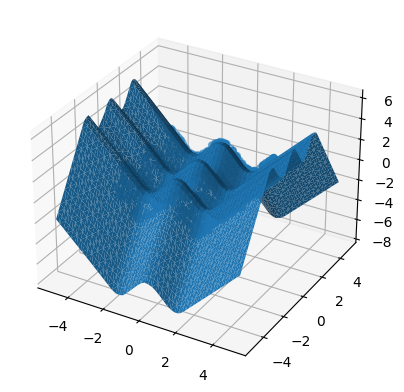

'\nThe neural network is not able to extrapolate since the model does not use a periodic activation function.\nHence, the function is not periodic wrt the inputs.\n'

In [19]:
# Test if neural network can extrapolate
# Plot prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot
line = np.linspace(-5, 5, 50)                                                       # 50 evenly spaced points between (-5, 5) along x1 and x2 axes
xx, yy = np.meshgrid(line, line)                                                    # meshgrid does the crossproduct between these sets of points (xx = x1 axis, yy = x2 axis])
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T                                   # model expects N x 2 input -> vstack stacks the 2 arrays vertically and transposes the result
Yhat = model.predict(Xgrid).flatten()                                               # result will be N x 1, not a 1D array of length N
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

'''
The neural network is not able to extrapolate since the model does not use a periodic activation function.
Hence, the function is not periodic wrt the inputs.
'''